In [1]:
from fragsys_analysis import *

In [2]:
main_dir = "."
results_dir = os.path.join(main_dir, "results/new")

In [3]:
UD_df = pd.read_pickle(os.path.join(results_dir, "UD_df.pkl"))

In [7]:
ann_pred_conf_df = pd.read_pickle(os.path.join(results_dir, "good_confidence_data.pkl"))

In [43]:
rsa_cluster_dict = load_pickle(os.path.join(results_dir, "rsa_cluster_dict.pkl"))

In [45]:
color_dict = {k:matplotlib.colors.to_hex(sample_colors[v]) for k, v in rsa_cluster_dict.items()}

In [18]:
blind = ['Q7LBC6_0_BS9',
 'Q92835_0_BS5',
 'P06873_0_BS6',
 'Q7LBC6_0_BS4',
 'P11838_0_BS2',
 'Q8WVM7_1_BS3',
 'Q6B0I6_0_BS5',
 'Q92835_0_BS0',
 'P0DTD1_2_BS3',
 'P0DTD1_2_BS15',
 'Q32ZE1_0_BS4',
 'Q5T0W9_0_BS4',
 'O15178_0_BS2',
 'P06873_0_BS0',
 'Q8WS26_0_BS10',
 'P06873_0_BS8',
 'Q9UGL1_0_BS2',
 'Q8WVM7_1_BS0',
 'P0DTD1_0_BS4',
 'Q9BRQ3_0_BS2',
 'O43809_0_BS3',
 'Q6PJP8_0_BS4',
 'Q9BRQ3_0_BS6',
 'Q9Y2J2_0_BS4',
 'Q32ZE1_0_BS3',
 'P0DTD1_0_BS13',
 'Q6B0I6_0_BS3']

In [64]:
ANN_wrong_preds = ["Q32ZE1_0_BS3"]
KNN_wrong_preds = ['Q8WVM7_1_BS3',
 'Q92835_0_BS0',
 'Q32ZE1_0_BS4',
 'Q9UGL1_0_BS2',
 'Q9BRQ3_0_BS2',
 'Q9BRQ3_0_BS6',
 'Q32ZE1_0_BS3']

In [60]:
print(UD_df.shape)
print(ann_pred_conf_df.shape)
print(len(blind))

(293, 293)
(2660, 4)
27


In [40]:
conf_dict = {}
for bsid in UD_df.index.tolist():
    if bsid in blind:
        conf_dict[bsid] = 0.1
        continue
    conf_bsid = ann_pred_conf_df[ann_pred_conf_df["id"] == bsid]["conf"].mean()
    conf_score = 1-(conf_bsid/9)
    if conf_score == 0:
        conf_score += 0.1
    conf_dict[bsid] = conf_score
conf_alphas = list(conf_dict.values())

In [61]:
len(conf_alphas)

293

In [65]:
conf_vals = []
conf_vals_dict = {}
for bsid in UD_df.index.tolist():
    if bsid in ANN_wrong_preds:
        conf_vals.append(-1)
        conf_vals_dict[bsid] = -1
        continue
    elif bsid in KNN_wrong_preds:
        conf_vals.append(-2)
        conf_vals_dict[bsid] = -2
        continue
    else:
        if bsid in blind:
            conf_vals.append(11)
            conf_vals_dict[bsid] = 11
            continue
    
        conf_bsid = ann_pred_conf_df[ann_pred_conf_df["id"] == bsid]["conf"].mean()
        conf_vals.append(conf_bsid)
        conf_vals_dict[bsid] = conf_bsid

In [54]:
conf_vals

[6.3,
 8.2,
 6.0,
 4.9,
 11,
 7.4,
 4.4,
 8.7,
 8.1,
 11,
 7.8,
 7.3,
 8.4,
 7.7,
 9.0,
 11,
 5.0,
 3.0,
 6.3,
 11,
 7.8,
 8.2,
 4.4,
 8.5,
 11,
 5.3,
 8.9,
 7.1,
 8.3,
 9.0,
 7.9,
 4.5,
 8.1,
 8.2,
 6.6,
 1.3,
 4.0,
 9.0,
 11,
 7.4,
 1.8,
 11,
 5.5,
 6.6,
 7.8,
 -1,
 11,
 0.9,
 1.7,
 5.8,
 0.5,
 8.7,
 2.3,
 7.9,
 8.7,
 8.7,
 8.9,
 8.2,
 8.8,
 4.9,
 1.7,
 11,
 6.7,
 4.1,
 7.9,
 8.0,
 6.9,
 6.2,
 7.1,
 11,
 8.6,
 5.0,
 1.4,
 0.7,
 7.9,
 2.5,
 9.0,
 5.2,
 1.3,
 2.7,
 3.9,
 8.5,
 9.0,
 7.2,
 11,
 6.4,
 8.0,
 4.1,
 4.1,
 8.3,
 7.9,
 8.9,
 3.3,
 8.9,
 7.2,
 9.0,
 2.3,
 5.9,
 4.6,
 5.6,
 8.4,
 7.7,
 3.3,
 8.3,
 6.4,
 3.9,
 4.2,
 3.3,
 5.5,
 7.1,
 7.6,
 7.6,
 8.3,
 2.0,
 8.4,
 1.5,
 8.8,
 8.0,
 2.7,
 9.0,
 9.0,
 11,
 7.6,
 8.7,
 6.9,
 7.3,
 11,
 5.1,
 3.0,
 8.9,
 1.6,
 8.8,
 6.6,
 3.2,
 8.2,
 5.3,
 6.0,
 7.1,
 8.4,
 7.9,
 6.1,
 8.7,
 9.0,
 4.9,
 4.0,
 9.0,
 8.4,
 8.6,
 6.4,
 8.8,
 8.3,
 6.4,
 11,
 8.3,
 11,
 7.4,
 3.9,
 7.0,
 8.5,
 7.3,
 2.7,
 8.5,
 5.9,
 7.5,
 1.7,
 9.0,
 7.3,
 8.1,
 3.4,
 8

In [74]:
cl = ["midnightblue" if 0 <= i < 4 else "orangered" if i == -1 else "red" if i == -2 else "limegreen" if i == 11  else "cornsilk" for i in conf_vals]

/cluster/gjb_lab/2394007/miniconda/envs/myenv2/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/cluster/gjb_lab/2394007/miniconda/envs/myenv2/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/tmp/1186463.1.priority.q/ipykernel_36335/2504777103.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


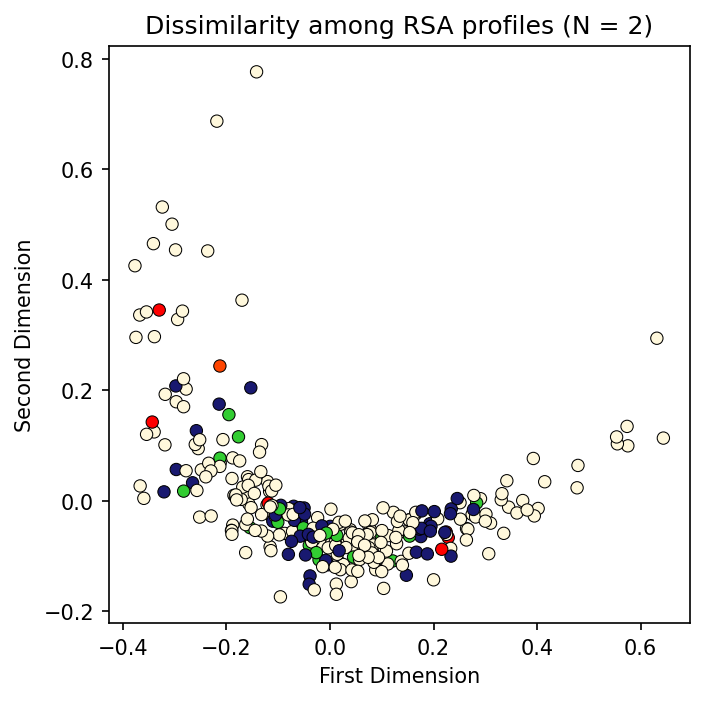

In [75]:
n=2
cols = list(color_dict.values())
mds_model = sklearn.manifold.MDS(n_components = n, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(UD_df)  
alphas = list(conf_dict.values())
mds_coords = mds_model.fit_transform(UD_df)

plt.figure(figsize=(5, 5), dpi= 150)
plt.scatter(
            mds_coords[:,0],mds_coords[:,1],
            c = cl, edgecolors = "k", s = 35,
            linewidth = 0.5, marker = "o", cmap = "binary_r"
            )
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among RSA profiles (N = {})'.format(n))
#plt.savefig(os.path.join(main_dir, "figs", "rsa_distrs_MDS_ward_n.png".format(n)))
plt.show()